In [ ]:
!gdown --fuzzy 'https://drive.google.com/file/d/14Q_QDMTyOckkFlQ-js74WNqeuKfyb6GP/view?usp=sharing' #dataset

In [7]:
import zipfile
import os
def silent_unzip(zip_path,extract_to):

    os.makedirs(extract_to, exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
silent_unzip('yolo.zip','yolo')

In [5]:
pwd

'/kaggle/working'

In [6]:
os.mkdir("dataset")

FileExistsError: [Errno 17] File exists: 'dataset'

In [ ]:
import random
import shutil


random.seed(42)

# Define paths
img_dir = "./yolo/images"
lbl_dir = "./yolo/labels"

train_img_dir = "./dataset/images/train"
val_img_dir = "./dataset/images/val"
train_lbl_dir = "./dataset/labels/train"
val_lbl_dir = "./dataset/labels/val"

# Create directories
for d in [train_img_dir, val_img_dir, train_lbl_dir, val_lbl_dir]:
    os.makedirs(d, exist_ok=True)

# Split files
images = [f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(images)

split_ratio = 0.9  
split_index = int(len(images) * split_ratio)

train_imgs = images[:split_index]
val_imgs = images[split_index:]

# Move files
for img_list, target_img_dir, target_lbl_dir in [(train_imgs, train_img_dir, train_lbl_dir), (val_imgs, val_img_dir, val_lbl_dir)]:
    for img_file in img_list:
        base = os.path.splitext(img_file)[0]
        label_file = base + ".txt"

        shutil.copy(os.path.join(img_dir, img_file), os.path.join(target_img_dir, img_file))
        shutil.copy(os.path.join(lbl_dir, label_file), os.path.join(target_lbl_dir, label_file))

In [14]:
%cd dataset

/kaggle/working/dataset


In [ ]:
%%writefile data.yaml
train: images/train
val: images/val

nc: 1
names: ['h_pylori']

In [10]:
!pip install ultralytics

In [11]:
from ultralytics import YOLO

In [12]:
model = YOLO('yolo11l') 

100%|██████████| 49.0M/49.0M [00:00<00:00, 240MB/s]


In [15]:


# Train with modified params
model.train(
    data='data.yaml',     # Your dataset config file
    epochs=200,            # Try lower values first
    imgsz= 1024,            # Reduce image size to speed up training
    batch=4,              # Smaller batch due to small dataset
    #patience=10,          # Early stopping
    name='small_dataset_yolo',
    project='runs/train',
    val=True
)

Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=small_dataset_yolo7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

train: Scanning /kaggle/working/dataset/labels/train.cache... 216 images, 20 backgrounds, 0 corrupt: 100%|██████████| 216/216 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3124.9±2334.8 MB/s, size: 2191.6 KB)


val: Scanning /kaggle/working/dataset/labels/val.cache... 25 images, 2 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]


Plotting labels to runs/train/small_dataset_yolo7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/train/small_dataset_yolo7
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      6.83G      3.683      6.821      1.496        145       1024: 100%|██████████| 54/54 [00:26<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all         25        295     0.0559     0.0983     0.0241    0.00692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      6.92G      3.089      3.175      1.198         34       1024: 100%|██████████| 54/54 [00:29<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/engine/validator.py:284: RuntimeWarning: invalid value encountered in greater_equal
  matches = np.nonzero(iou >= threshold)  # IoU > threshold and classes match
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all         25        295   0.000157    0.00339   7.46e-05   2.24e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      6.92G      3.088      2.952      1.186         82       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         25        295   0.000667     0.0136   0.000338   5.89e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      7.24G      3.179      3.047      1.209         55       1024: 100%|██████████| 54/54 [00:26<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all         25        295          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      7.34G       3.11      2.731      1.195         84       1024: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all         25        295    0.00569      0.112    0.00309   0.000941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      7.43G      3.019      2.769      1.161         75       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         25        295     0.0135      0.241    0.00778    0.00246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      7.07G      2.978      2.566      1.157         20       1024: 100%|██████████| 54/54 [00:27<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all         25        295      0.178      0.207      0.102     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      7.17G      3.053      2.554      1.141        147       1024: 100%|██████████| 54/54 [00:27<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all         25        295     0.0809       0.18      0.041      0.011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      7.26G      2.923      2.604      1.111         38       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all         25        295      0.151        0.2     0.0801     0.0239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      7.36G      2.962      2.615      1.114         29       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]

                   all         25        295      0.145      0.241     0.0814      0.026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       6.9G      2.905      2.411      1.137         39       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all         25        295      0.179      0.197     0.0907     0.0265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      7.07G      2.835      2.507      1.094        135       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]

                   all         25        295      0.194      0.193     0.0993      0.026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      7.15G      2.882      2.575      1.086        255       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]

                   all         25        295       0.31      0.149      0.153     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      7.43G      2.799      2.506      1.106         17       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all         25        295       0.24      0.208      0.153     0.0503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      7.13G      2.813      2.503      1.087        102       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all         25        295     0.0918      0.108     0.0457     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      7.22G      2.818      2.539      1.081        142       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all         25        295      0.207      0.261      0.153     0.0454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      7.32G      2.804      2.443      1.106         93       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         25        295      0.221      0.231      0.139     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      7.42G      2.776      2.362      1.103         64       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all         25        295       0.21      0.214      0.136      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      6.91G      2.816      2.502      1.087        100       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         25        295      0.223      0.146      0.101      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      7.14G      2.834      2.467      1.114        101       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]

                   all         25        295      0.165      0.207     0.0977     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      7.24G       2.78      2.408      1.083         50       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all         25        295      0.332      0.281      0.197     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      7.53G      2.794      2.349      1.078         82       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]

                   all         25        295      0.224      0.203      0.112     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200         7G      2.644      2.241      1.089         55       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all         25        295      0.158       0.22      0.091     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      7.09G      2.717      2.388      1.067         48       1024: 100%|██████████| 54/54 [00:27<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all         25        295      0.146      0.176     0.0865     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      7.19G       2.74      2.352      1.058        114       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all         25        295      0.255      0.217      0.171     0.0523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      7.44G      2.714      2.259      1.093         49       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all         25        295      0.212       0.24      0.147     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200         7G      2.729      2.235      1.077        100       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all         25        295      0.268      0.183      0.147     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200       7.1G      2.678      2.263      1.089         87       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all         25        295      0.321      0.268      0.201     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      7.39G      2.673      2.294      1.071         77       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all         25        295      0.372      0.251      0.238     0.0695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      6.92G       2.69      2.287      1.058         38       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all         25        295      0.281      0.241       0.16     0.0465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      7.02G      2.722      2.265      1.069         55       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all         25        295      0.278      0.292      0.217     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      7.25G      2.694      2.187      1.062         95       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all         25        295      0.358      0.268      0.231     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      7.35G      2.641      2.177      1.078         98       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all         25        295       0.28      0.264        0.2     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      7.37G      2.608      2.179      1.084         76       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]

                   all         25        295      0.326      0.281      0.225     0.0781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      7.37G      2.618      2.258      1.037         82       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         25        295      0.334      0.302      0.237     0.0785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      7.54G       2.61      2.238      1.057         93       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all         25        295      0.298      0.302      0.245     0.0819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200       7.1G      2.644      2.206      1.061        141       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all         25        295      0.361      0.244      0.204     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      7.19G      2.606      2.225      1.063         97       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all         25        295      0.359      0.292      0.244     0.0818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      7.29G      2.597      2.174      1.051         79       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all         25        295      0.333      0.264      0.239     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      7.38G      2.604      2.178      1.029        105       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all         25        295      0.429      0.271      0.281     0.0935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      6.93G      2.624      2.128      1.082         39       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]

                   all         25        295      0.321      0.261      0.236     0.0727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      7.17G      2.646      2.187       1.04         49       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all         25        295      0.393      0.294       0.25     0.0764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      7.26G      2.598       2.15      1.031        136       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all         25        295       0.26      0.251      0.164     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      7.36G      2.586      2.116       1.05         89       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         25        295      0.311      0.308      0.236     0.0756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      6.89G      2.586       2.12      1.044        152       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all         25        295      0.295      0.258      0.209     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      7.06G      2.666      2.223      1.071        113       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]

                   all         25        295       0.31       0.29      0.236     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      7.15G      2.593      2.149      1.062         56       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all         25        295      0.374      0.319      0.251     0.0792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      7.25G      2.595      2.111      1.047         21       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all         25        295      0.378      0.292      0.274     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      7.35G      2.515      2.116      1.045         64       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all         25        295      0.396      0.217      0.248     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      7.36G      2.573      2.074      1.044         88       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         25        295      0.324      0.308      0.246     0.0779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      7.36G      2.543      2.066      1.037        199       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all         25        295      0.323      0.353      0.268     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      7.36G      2.571      2.169      1.039        178       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all         25        295      0.368      0.342      0.291       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      7.55G      2.572      2.184      1.038        101       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         25        295      0.404      0.308      0.253     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      7.16G      2.525      2.121      1.035        213       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]

                   all         25        295      0.421      0.361      0.319      0.095



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      7.25G      2.522      2.108      1.043        174       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all         25        295      0.361      0.298      0.262     0.0822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      7.35G      2.555      2.084      1.046         96       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all         25        295      0.394      0.359      0.304      0.096



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      7.45G      2.527      2.029      1.046        111       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all         25        295      0.339      0.359      0.296     0.0925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200       7.1G      2.563      2.084      1.048        229       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all         25        295      0.421      0.345      0.312     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200       7.2G      2.547      2.061      1.034        142       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]

                   all         25        295      0.416      0.342       0.31      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      7.29G      2.519          2      1.051        115       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all         25        295      0.358      0.332      0.275     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      7.39G      2.548      2.013      1.057        125       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all         25        295      0.224      0.268      0.169     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      7.04G      2.532      2.033      1.034         79       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

                   all         25        295      0.323      0.332      0.253     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      7.13G      2.502      2.059      1.009         92       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]

                   all         25        295      0.376      0.308      0.278      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      7.43G      2.511      2.071       1.05        107       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all         25        295      0.305      0.315      0.198     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200       6.9G      2.578      2.105      1.023         67       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all         25        295      0.415      0.308      0.293     0.0913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      7.12G      2.533      2.055      1.045        111       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]

                   all         25        295      0.345      0.336      0.263     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      7.43G      2.552      2.101      1.036        101       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]

                   all         25        295       0.37      0.342       0.29     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      7.18G      2.493      2.005      1.022         32       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         25        295      0.393      0.329      0.297     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      7.28G       2.49       2.01      1.025        116       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all         25        295      0.374      0.359      0.296     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      7.37G      2.493      1.948      1.021         94       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all         25        295      0.307      0.359      0.263     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      6.91G      2.475       2.03      1.047         97       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all         25        295      0.397      0.347      0.291     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      7.17G       2.46      2.005      1.017        164       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         25        295      0.398      0.336      0.307      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      7.54G      2.434      1.914      1.033         72       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all         25        295      0.371       0.33      0.294     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      7.15G      2.494      2.041      1.005        178       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         25        295      0.395      0.297      0.265     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      7.23G      2.485      2.026      1.035        130       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]

                   all         25        295      0.373      0.349      0.266      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      7.33G      2.532      2.011      1.038        240       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all         25        295      0.373      0.322      0.266     0.0857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      7.43G      2.466      1.992      1.006         71       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         25        295      0.379      0.312      0.287     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      7.12G      2.432      1.947      1.021        107       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

                   all         25        295      0.387      0.353      0.298      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      7.49G      2.484       1.96      1.032         36       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all         25        295      0.353      0.264      0.247     0.0868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      6.92G      2.438      1.908      1.008         87       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         25        295      0.365      0.333      0.266      0.088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      7.22G      2.457      1.926      1.027        101       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         25        295      0.462      0.369      0.336      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      7.32G      2.458      1.932       1.02         52       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]

                   all         25        295      0.394      0.339      0.285     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200       7.6G      2.481      1.965     0.9976         99       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]

                   all         25        295      0.409      0.366       0.31      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      6.94G      2.455      1.893      1.014         88       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]

                   all         25        295      0.465      0.271      0.276     0.0976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      7.02G      2.432      1.895      1.033         34       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         25        295      0.312      0.346      0.246     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      7.27G      2.417      1.909      1.014         81       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         25        295      0.395      0.332      0.298      0.099



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      7.54G      2.464       1.95      1.031        139       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all         25        295      0.377      0.353      0.315     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      6.95G       2.41       1.92      1.029         64       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]

                   all         25        295      0.383      0.261      0.247     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      7.03G      2.435      1.918      1.018         63       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all         25        295      0.421      0.333      0.296     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      7.29G      2.408      1.895     0.9967         67       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         25        295       0.44      0.319      0.309      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      7.58G      2.434      1.875      1.015        130       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all         25        295       0.41      0.322      0.303     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      6.91G      2.401      1.861      1.028         27       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]

                   all         25        295      0.387      0.356      0.307     0.0952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      7.16G      2.441      1.872      1.025         25       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]

                   all         25        295      0.378      0.373      0.314      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      7.26G      2.444      1.945      1.017         48       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         25        295      0.383      0.386      0.322      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      7.36G       2.37       1.86     0.9978         96       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         25        295      0.397      0.359      0.317      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      7.28G       2.41      1.831       1.01         98       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         25        295      0.412      0.363      0.334       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      7.55G      2.406       1.84      1.018         92       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all         25        295      0.407      0.353      0.331      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      7.12G       2.38       1.87       1.01        121       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         25        295      0.457      0.325      0.314      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      7.22G      2.363      1.823      1.012        115       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         25        295      0.427      0.353      0.308     0.0981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      7.31G      2.367      1.778      1.012         51       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         25        295      0.436      0.325      0.307      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      7.41G      2.314      1.796     0.9993        118       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all         25        295      0.397      0.329      0.287     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      6.93G      2.424      1.837      1.009        112       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all         25        295       0.43      0.329       0.31      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200       7.5G      2.426      1.946      1.017        322       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all         25        295      0.468      0.376      0.345      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      7.11G        2.4      1.868      1.018        151       1024: 100%|██████████| 54/54 [00:27<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all         25        295      0.405      0.386      0.348      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      7.21G      2.351      1.868     0.9961         38       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         25        295      0.461      0.315      0.336      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      7.63G      2.371      1.816      1.008         76       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all         25        295      0.407      0.366      0.313      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      6.91G      2.356      1.828      0.992         47       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]

                   all         25        295      0.374      0.366      0.315      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      7.19G      2.373      1.887     0.9986        183       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         25        295      0.466      0.325      0.315      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      7.29G      2.306      1.795      1.009         81       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]

                   all         25        295      0.431      0.308      0.335      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      7.38G      2.343      1.792      1.015        174       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all         25        295      0.444      0.353      0.349      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      7.08G      2.338      1.816      1.013         86       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         25        295      0.376      0.336      0.314      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      7.17G      2.351      1.888     0.9954         49       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all         25        295       0.34      0.322      0.276     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      7.27G      2.371      1.821      1.008        139       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         25        295      0.405       0.38      0.336      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      7.82G      2.315      1.773       1.01        110       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all         25        295      0.367      0.336      0.256     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200       7.1G      2.332      1.796      1.004         62       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         25        295      0.413      0.339      0.307      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      7.19G      2.309      1.748      1.008         85       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]

                   all         25        295      0.378      0.363      0.313      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      7.28G      2.286      1.805      1.005        160       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all         25        295      0.403      0.322      0.289      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      7.87G      2.336      1.739      1.008         61       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all         25        295      0.375       0.38      0.314      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      7.13G      2.295       1.72       1.01        137       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         25        295      0.386      0.319      0.295      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      7.21G      2.327      1.743     0.9918         54       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         25        295       0.47      0.339      0.309      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      7.31G      2.314      1.767     0.9927        124       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all         25        295      0.422      0.356       0.32      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      7.41G      2.328      1.765       1.01         98       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all         25        295      0.376      0.329      0.291     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      6.93G      2.325      1.744      1.001         87       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         25        295      0.345       0.38      0.282      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      7.02G      2.297      1.754     0.9934        118       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all         25        295       0.34      0.353      0.286     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      7.31G      2.373       1.84     0.9913        209       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         25        295      0.356      0.366      0.308      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200       7.4G      2.292      1.761          1         82       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         25        295      0.393      0.393      0.332      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      7.36G      2.295       1.73     0.9948        105       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all         25        295      0.382      0.359      0.297      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      7.41G      2.252      1.694      0.975         86       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]

                   all         25        295      0.429      0.319      0.284     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      7.11G      2.263      1.705      1.001         76       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         25        295        0.4      0.342      0.293        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      7.21G      2.255      1.705      0.988        278       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]

                   all         25        295      0.422      0.373      0.308      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200       7.3G      2.282        1.7     0.9895         66       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]

                   all         25        295      0.409      0.366      0.332      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200       7.4G      2.252      1.689     0.9897         48       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]

                   all         25        295      0.421      0.376      0.328      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      6.95G      2.253      1.673     0.9797        107       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         25        295      0.404       0.39      0.334      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      7.21G       2.25      1.654     0.9973         53       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         25        295      0.427       0.38      0.317      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      7.31G      2.335      1.743     0.9735         78       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all         25        295      0.452      0.319      0.313      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200       7.4G      2.223      1.711     0.9928        125       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all         25        295      0.377       0.38      0.317      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      6.95G      2.247      1.631     0.9849        156       1024: 100%|██████████| 54/54 [00:27<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all         25        295      0.371      0.392       0.32      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      7.45G      2.242      1.727     0.9761         74       1024: 100%|██████████| 54/54 [00:27<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all         25        295      0.443      0.347      0.318      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      6.93G      2.242      1.686     0.9926         58       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         25        295      0.427      0.342      0.316      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      7.03G      2.218      1.641      1.003         65       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all         25        295      0.442      0.366      0.313      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      7.35G      2.185      1.676      0.979        180       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all         25        295      0.397       0.38      0.319      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      7.45G      2.216      1.665     0.9858         28       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         25        295      0.424      0.353      0.302      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      7.15G      2.188       1.64     0.9679        230       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         25        295      0.379      0.364      0.308      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      7.23G      2.204      1.638     0.9784         71       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]

                   all         25        295      0.421      0.346      0.306      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      7.33G      2.246      1.625     0.9937        105       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         25        295       0.41       0.38      0.317      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      7.43G      2.216      1.657     0.9855         17       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all         25        295      0.397      0.322      0.288     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      7.08G      2.254      1.673     0.9743         94       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         25        295      0.346       0.38      0.281     0.0982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      7.16G      2.179      1.651     0.9666        137       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all         25        295      0.338      0.414        0.3      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      7.51G      2.195      1.574      0.975         47       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         25        295      0.366      0.368      0.302      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      7.12G       2.21      1.625      0.964        110       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]

                   all         25        295      0.464      0.367      0.346      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      7.21G      2.155      1.636     0.9713         74       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all         25        295      0.439      0.376      0.338       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200       7.3G      2.213      1.672     0.9677        151       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]

                   all         25        295      0.438      0.359      0.338      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200       7.4G      2.189      1.652     0.9812         94       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all         25        295       0.39      0.357       0.33      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      6.96G      2.185      1.589      0.971         73       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all         25        295      0.413      0.317      0.328       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      7.22G      2.145      1.558     0.9748         80       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]

                   all         25        295      0.462      0.339      0.328       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      7.31G      2.129      1.555     0.9891         50       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         25        295      0.395      0.359      0.324      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      7.41G       2.17      1.646     0.9652        254       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all         25        295      0.411      0.383      0.329      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      6.95G      2.201       1.62     0.9795        110       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all         25        295      0.466      0.339       0.31      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      7.02G      2.145      1.638     0.9774        141       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all         25        295      0.419      0.329      0.301      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      7.45G      2.183      1.564     0.9748        226       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

                   all         25        295      0.486      0.356      0.329      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      6.92G      2.165      1.525     0.9763        139       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all         25        295      0.389      0.366      0.317      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      7.01G      2.151      1.541     0.9642         50       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         25        295      0.416      0.356      0.318       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      7.25G      2.133      1.524      0.965        123       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all         25        295      0.448      0.349      0.329       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      7.53G      2.189      1.593      0.975        129       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all         25        295      0.431      0.346      0.313      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      7.11G      2.105      1.546     0.9607         35       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         25        295      0.352      0.366      0.278     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      7.45G      2.141       1.54      0.975         75       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         25        295      0.383      0.366      0.303     0.0982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      7.11G      2.152      1.556     0.9658         87       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all         25        295      0.405      0.353      0.309      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200       7.2G      2.147      1.533     0.9679         57       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]

                   all         25        295      0.407      0.363      0.305      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      7.59G      2.068      1.462     0.9731        157       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         25        295      0.414      0.335      0.293      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      7.43G      2.133      1.485     0.9556        163       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all         25        295      0.382       0.38      0.289      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      6.94G      2.118      1.543     0.9521        167       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all         25        295      0.367      0.353      0.299      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      7.04G      2.138      1.502     0.9572        109       1024: 100%|██████████| 54/54 [00:27<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         25        295      0.439      0.315      0.303       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      7.34G      2.131      1.528     0.9649        102       1024: 100%|██████████| 54/54 [00:27<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all         25        295      0.409      0.353      0.278     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      7.43G      2.077      1.492     0.9515        108       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all         25        295      0.375      0.356      0.271     0.0981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200         7G        2.1      1.483     0.9509         44       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all         25        295      0.363      0.373      0.291      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      7.06G      2.104      1.518     0.9541         59       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all         25        295      0.349      0.393      0.287     0.0961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      7.33G      2.135      1.512     0.9598         49       1024: 100%|██████████| 54/54 [00:27<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all         25        295      0.373       0.38      0.285        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      7.43G      2.111      1.467     0.9655         89       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         25        295      0.409      0.373      0.304      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      7.17G      2.117      1.525     0.9537         44       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         25        295       0.38      0.403      0.317      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      7.24G       2.07      1.491     0.9668         38       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         25        295      0.393      0.383      0.306      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      7.34G       2.13      1.509     0.9729         81       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all         25        295      0.403      0.359      0.314      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      7.43G      2.114      1.505     0.9624         97       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all         25        295      0.398      0.383      0.338      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      6.94G      2.108      1.481     0.9665         72       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all         25        295      0.375       0.41      0.329      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200       7.2G      2.121      1.457     0.9606        122       1024: 100%|██████████| 54/54 [00:27<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]

                   all         25        295        0.4      0.403      0.335      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200       7.3G       2.08      1.457     0.9561        108       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all         25        295      0.394       0.38      0.322      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      7.39G      2.027      1.473     0.9516        135       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         25        295      0.406      0.356      0.317      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      7.13G      2.114      1.496     0.9667         73       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all         25        295      0.413      0.353      0.312      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200       7.2G      2.027      1.447     0.9527         43       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all         25        295      0.419      0.366      0.328      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200       7.3G      2.057      1.455     0.9531        200       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all         25        295      0.377       0.41      0.325      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      7.58G      2.017      1.414     0.9601        115       1024: 100%|██████████| 54/54 [00:27<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         25        295      0.377      0.397      0.312      0.112


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      6.94G      2.084      1.555     0.9841         20       1024: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all         25        295      0.411      0.315      0.293      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      7.02G      2.061      1.538     0.9635         13       1024: 100%|██████████| 54/54 [00:26<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all         25        295      0.343      0.357      0.284     0.0967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      7.28G      2.117      1.531     0.9782         36       1024: 100%|██████████| 54/54 [00:26<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         25        295      0.355      0.332      0.285     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      7.38G      2.066      1.512     0.9724         56       1024: 100%|██████████| 54/54 [00:27<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         25        295      0.375      0.356      0.292      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      6.96G      2.052      1.513     0.9531         30       1024: 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         25        295      0.366      0.366      0.296      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      7.02G       2.04      1.522     0.9602         37       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all         25        295       0.38      0.353      0.295      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      7.12G      2.069      1.489     0.9616         49       1024: 100%|██████████| 54/54 [00:27<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all         25        295      0.388      0.346      0.291     0.0981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      7.36G      1.974      1.428     0.9701         39       1024: 100%|██████████| 54/54 [00:26<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all         25        295      0.378      0.349      0.287      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      6.89G      2.033      1.453     0.9672        107       1024: 100%|██████████| 54/54 [00:27<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all         25        295      0.389      0.349      0.296      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      6.89G      1.981      1.507     0.9536        103       1024: 100%|██████████| 54/54 [00:26<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all         25        295      0.385      0.346      0.298      0.103



200 epochs completed in 1.626 hours.
Optimizer stripped from runs/train/small_dataset_yolo7/weights/last.pt, 51.2MB
Optimizer stripped from runs/train/small_dataset_yolo7/weights/best.pt, 51.2MB

Validating runs/train/small_dataset_yolo7/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         25        295      0.463      0.369      0.344      0.125
Speed: 2.8ms preprocess, 42.4ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/train/small_dataset_yolo7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a2e56234210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [16]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4017.0±2023.7 MB/s, size: 2710.6 KB)


val: Scanning /kaggle/working/dataset/labels/val.cache... 25 images, 2 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         25        295      0.467      0.368       0.35      0.129
Speed: 3.9ms preprocess, 53.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/train/small_dataset_yolo72
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a2e56311c10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.03

In [ ]:
pwd

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_boxes(image, boxes, color=(0, 255, 0), label=''):
    for box in boxes:
        x_center, y_center, width, height = box
        h, w, _ = image.shape
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        if label:
            cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    return image

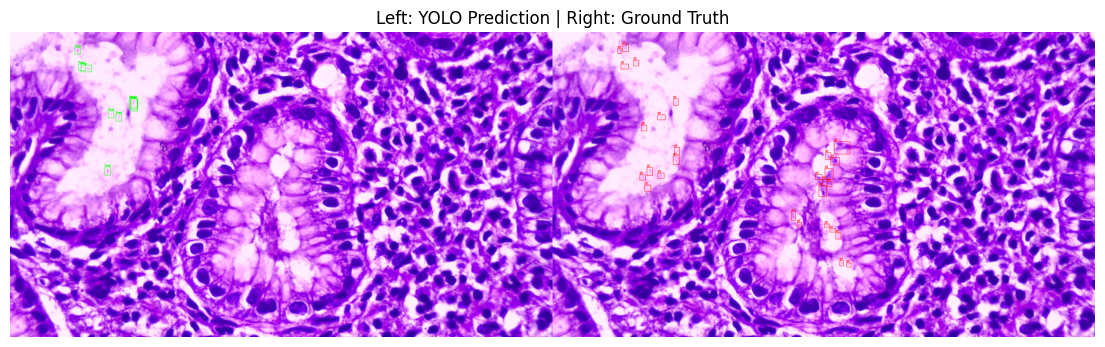

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/kaggle/working/dataset/images/val/505763ba-00057.jpg' #replace with path of image in val folder
label_path = '/kaggle/working/dataset/labels/val/505763ba-00057.txt' #replace with path of label of the image in val folder

# Load original image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Predict with YOLO
results = model.predict(image, conf=0.1, verbose=False)
boxes = results[0].boxes.xywhn.cpu().numpy()  # normalized (x_center, y_center, w, h)
confs = results[0].boxes.conf.cpu().numpy()

# Filter predicted boxes by confidence
pred_boxes = [box for box, conf in zip(boxes, confs) if conf >= 0.1]

# Load ground truth boxes (YOLO format: class x_center y_center width height)
gt_boxes = []
with open(label_path, 'r') as f:
    for line in f:
        parts = list(map(float, line.strip().split()))
        gt_boxes.append(parts[1:])  # skip class_id

# Draw boxes using your draw_boxes() function
img_pred = draw_boxes(image.copy(), pred_boxes, color=(0, 255, 0), label='Pred')  # Green
img_gt = draw_boxes(image.copy(), gt_boxes, color=(255, 0, 0), label='GT')        # Red

# Concatenate
combined = np.concatenate((img_pred, img_gt), axis=1)

# Show result
plt.figure(figsize=(14, 7))
plt.imshow(combined)
plt.axis('off')
plt.title("Left: YOLO Prediction | Right: Ground Truth")
plt.show()
